In [339]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [249]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [250]:
listings.columns.values


array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

 ### Dropping unnecesary columns



There are 92 columns, and a lot of them are text like descriptions, and reviews. Also are lot's of information about the Airbnb web page, different urls of the listing. 
We are keeping different metrics from the host like response rate, acceptanace rate. Also about the place to rent, number of bedrooms, bathrooms, zipcode, etc...

In [251]:
listings = listings[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]


In [252]:
listings.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
4,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


In [253]:
# of NaN values
listings.isnull().sum()/len(listings)

host_response_rate      0.136983
host_acceptance_rate    0.202462
host_is_superhost       0.000524
host_listings_count     0.000524
zipcode                 0.001833
property_type           0.000262
room_type               0.000000
accommodates            0.000000
bathrooms               0.004191
bedrooms                0.001572
beds                    0.000262
price                   0.000000
number_of_reviews       0.000000
review_scores_rating    0.169460
cancellation_policy     0.000000
reviews_per_month       0.164222
dtype: float64

#### Cleaning Data

In [254]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")
listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")

In [255]:
listings['host_acceptance_rate'].value_counts(dropna=False)

 100.0    3044
NaN        773
 0.0         1
Name: host_acceptance_rate, dtype: int64

In [256]:
listings['host_response_rate'].value_counts(dropna=False)

 100.0    2371
NaN        523
 90.0      165
 80.0      104
 99.0       78
 88.0       66
 50.0       52
 94.0       46
 67.0       41
 75.0       32
 89.0       32
 86.0       30
 96.0       28
 98.0       28
 70.0       25
 97.0       21
 83.0       20
 60.0       20
 93.0       18
 92.0       18
 33.0       14
 40.0       12
 63.0       11
 71.0        8
 78.0        8
 95.0        8
 91.0        5
 43.0        4
 87.0        3
 25.0        3
 76.0        3
 64.0        3
 57.0        2
 17.0        2
 58.0        2
 82.0        2
 30.0        1
 68.0        1
 38.0        1
 56.0        1
 53.0        1
 31.0        1
 55.0        1
 69.0        1
 81.0        1
 65.0        1
Name: host_response_rate, dtype: int64

Removing al rows with NaN values

In [257]:
listings.drop(columns='host_acceptance_rate', inplace=True)

In [258]:
listings.dropna(inplace=True)


In [259]:
listings['superhost']=np.where(listings['host_is_superhost']=='t',1,0)
listings.drop(columns='host_is_superhost', inplace=True)

Converting categories into dummies

In [260]:
non_num_vars = listings.select_dtypes(include=['object']).columns
listings[non_num_vars].head()

,zipcode,property_type,room_type,cancellation_policy
0,98119,Apartment,Entire home/apt,moderate
1,98119,Apartment,Entire home/apt,strict
2,98119,House,Entire home/apt,strict
4,98119,House,Entire home/apt,strict
6,98119,House,Private room,moderate


In [261]:
 listings[listings.zipcode == '99\n98122'].index
 listings.at[859,'zipcode'] = '98122'

In [262]:
listings.zipcode.value_counts()

98122    320
98103    298
98102    236
98101    163
98105    160
98121    157
98144    151
98107    139
98109    138
98115    132
98117    129
98118    122
98112    120
98119    103
98116     81
98104     77
98125     48
98199     48
98106     47
98108     45
98126     37
98136     33
98133     29
98177     13
98134      4
98178      4
98146      2
Name: zipcode, dtype: int64

In [263]:
dummy_vars = pd.get_dummies(listings[non_num_vars])

In [264]:
dummy_vars.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Dropping categorical columns, and merging data set with dummies dataset

In [265]:
# drop non-numeric variables from df2 and add the dummies
listings = listings.drop(columns=non_num_vars)
listings = pd.merge(listings,dummy_vars, left_index=True, right_index=True)
listings.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,4.07,...,0,0,0,0,1,0,0,0,1,0
1,98.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,1.48,...,0,0,0,0,1,0,0,0,0,1
2,67.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,1.15,...,0,0,0,0,1,0,0,0,0,1
4,100.0,2.0,6,2.0,3.0,3.0,450.0,38,92.0,0.89,...,0,0,0,0,1,0,0,0,0,1
6,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,2.46,...,0,0,0,0,0,1,0,0,1,0


#### Data Visualization

/Users/seba/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


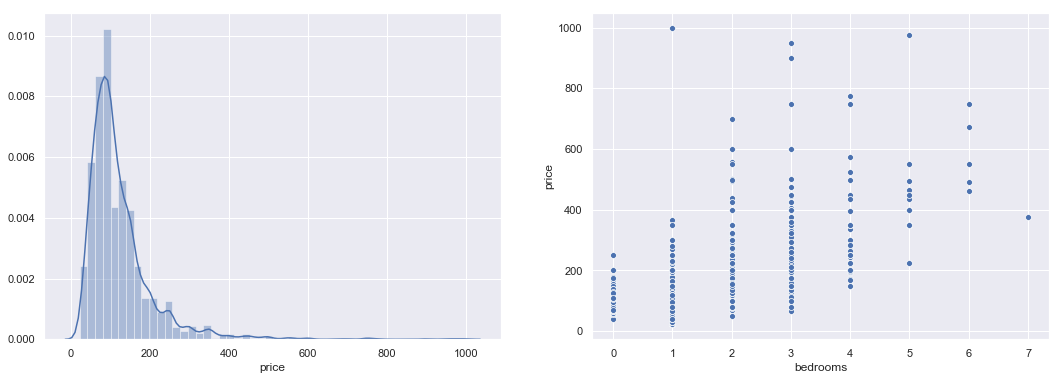

In [266]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.distplot(listings['price'], hist=True, norm_hist=True, ax=ax[0])
sns.scatterplot(x=listings['bedrooms'], y=listings['price'], ax=ax[1])

<Figure size 1800x432 with 0 Axes>

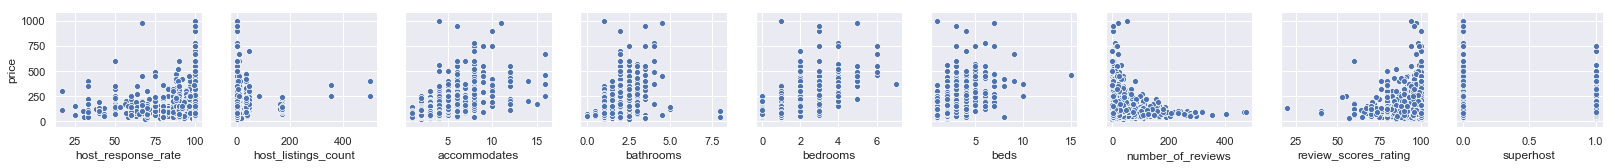

In [267]:
cols = ['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
       'review_scores_rating', 'superhost']
plt.figure(figsize=(25,6))
sns.pairplot(data=listings,
                  y_vars=['price'],
                  x_vars=cols);


![](img/pairplot.png)

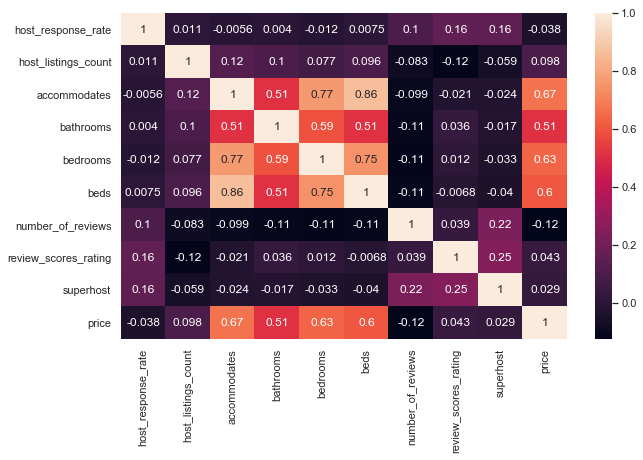

In [268]:
cols.append('price')
plt.figure(figsize=(10,6))

sns.heatmap(listings[cols].corr(), annot=True)



Since there is a low correlation with some features like host_response_rate, host_listing_count and some more, we are going to drop it, and keep the features strongly correlated

In [269]:
listings_with_low_corr = listings.copy()

In [270]:
listings.drop(columns=['host_response_rate','host_listings_count','review_scores_rating','superhost'],
              inplace=True)

### Predictions

For calculate the price prediction, we are going to implement different algorithms.

Since this is Regression problem, we selected:

* Linear Regression
* Logistic Regression
* Support Vector Machine
* Random Forest
* KNN

We are going to test all of them, and check the R^2 to test their accuracy

In [271]:
listings_with_low_corr.shape

(2836, 60)

In [272]:
listings.shape

(2836, 56)

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [294]:
X = listings.drop(columns='price')
y = listings['price']

In [295]:
X = normalize(X)

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [354]:
models = [(LinearRegression(),'LinearRegression'),
          (Lasso(0.1),'Lasso'),
          (Ridge(0.1),'Ridge'),
          (ElasticNet(alpha=0.01),'ElasticNet'),
          (RandomForestRegressor(n_estimators=150, max_features='sqrt', max_depth=12),'RandomForesRegressor'),
          (KNeighborsRegressor(n_neighbors=5, algorithm='brute'),'KneighborsRegressor'),
          (SVR(kernel='linear'),'SVM'),
          (LogisticRegression(),'LogisticRegression'),
          (GradientBoostingRegressor(),'GradientBoostingRegressor')
          ]
 
test_models = pd.DataFrame()
tmp_test = {}


for (model, model_name) in models:
    tmp_test['Model'] = model_name
    # fit model on training dataset
    model.fit(X_train, y_train)
    # predict prices for test dataset and calculate r^2
    y_pred = model.predict(X_test)
    tmp_test['R^2'] = r2_score(y_test, y_pred)
    tmp_test['MSE'] = mean_squared_error(y_test, y_pred)
    # write obtained data
    test_models = test_models.append([tmp_test])
test_models.set_index('Model', inplace=True)

/Users/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


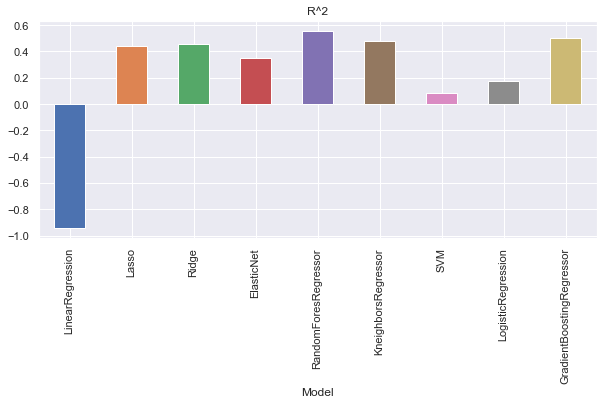

In [355]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
test_models['R^2'].plot(ax=axes, kind='bar', title='R^2')
plt.show()

### Prediction conclusion

We tried with a bunch of different Algorithms to predict the price regardings, most of house conditions, #bed, #rooms. But also about some user properties.
At the end we finish with highly correlated values and categorical ones

Based on the results, we have different groups. One group that perform "correct", still with a lot to improve in how their are performing since the R^2 score it is not high enough. 

We tried with several parameters, trying to find better models. Finally results where variating but not enough to show both, so we decided to keep the ones performing better or without overfitting

* RandomForesRegressor         0.559629
* GradientBoostingRegressor    0.500450
* KneighborsRegressor          0.481895
* Ridge                        0.456113
* Lasso                        0.441548
* ElasticNet                   0.350084

Then we have another group that doesn't perform well, the R^2 score is low.
* SVM                     0.081684
* LogisticRegression      0.177440

Finally, we have the LinearReression, that the R^2 is almost -100. The insight we take from this is that this model for this problem it is completely wrong. 

We tried different things to improve the models, specially LinearRegression which surprised us on how bad performs.
We added polynomial regression but the performance was drecreasing with degree 2 and 3

* LinearRegression       -0.944876

We are going to plot now the residualds graph to each model, and try to get a better understanding how they are performing.






In [343]:
test_models['MSE'].apply(math.sqrt)

Model
LinearRegression             115.548460
Lasso                         61.917169
Ridge                         61.104433
ElasticNet                    66.795465
RandomForesRegressor          55.581931
KneighborsRegressor           59.638543
SVM                           79.398864
LogisticRegression            75.145352
GradientBoostingRegressor     58.505034
Name: MSE, dtype: float64

##### Mean Square error
We can see the Mean error relates correctly with the R^2, since the better the performance of R^2, the lowest MSE